# Dataset Description

2년 동안 시간당 임대 데이터가 제공됩니다. 이번 대회의 경우 훈련 세트는 매월 19일, 테스트 세트는 20일부터 말일까지입니다. 테스트 세트가 적용되는 각 시간 동안 대여한 자전거의 총 수를 대여 기간 이전에 사용할 수 있는 정보만 사용하여 예측해야 합니다.

# Data Fields
- datetime : 시간별 날짜  👉 수치형/연속형
- season : 1:1사분기 / 2:2사분기/ 3:3사분기 / 4:4사분기  👉 범주형/순서형
- holiday : 휴일  👉 범주형/명목형
- workingday : 평일  👉 범주형/명목형
- weather : 1:맑음 / 2:흐림 / 3:가벼운 비 / 4:폭우  👉 범주형/명목형
- temp : 기온  👉 수치형/연속형
- atemp : 체감기온  👉 수치형/연속형
- humidity : 습도  👉 수치형/연속형
- windspeed : 풍속  👉 수치형/연속형
- casual : 미등록된 사용자 대여수  👉 수치형/이산형
- registered : 등록된 사용자 대여수  👉 수치형/이산형
- count : 총 대여수  👉 수치형/이산형

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# Load Data

In [2]:
#parse_dates는 해당 column의 type을 datetime으로 만들어준다

df_train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
df_submission = pd.read_csv('data/sampleSubmission.csv', parse_dates=['datetime'])

In [3]:
print(df_train.shape)
df_train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(df_test.shape)
df_test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
print(df_train.shape, df_test.shape)
print("훈련 데이터")
print(df_train.dtypes)
print("테스트 데이터")
print(df_test.dtypes)

(10886, 12) (6493, 9)
훈련 데이터
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
테스트 데이터
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


# Preliminary Wrangling

## 중복 체크

In [6]:
sum(df_train.duplicated()), sum(df_test.duplicated())  #훈련, 테스트 데이터에 중복값이 없다

(0, 0)

## 결측치 체크

In [7]:
df_train.isnull().sum()  #훈련 데이터에 결측치가 없다

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df_test.isnull().sum()  #테스트 데이터에 결측치가 없다

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## datetime을 세부적으로 나누기

년, 월, 일, 시간 ,분, 초를 각각 컬럼으로 만든다

In [9]:
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second

In [10]:
print(df_train.shape)
df_train.head()

(10886, 18)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# Visualization

## 년, 월, 일, 시간, 분, 초에 따른 대여량 평균치

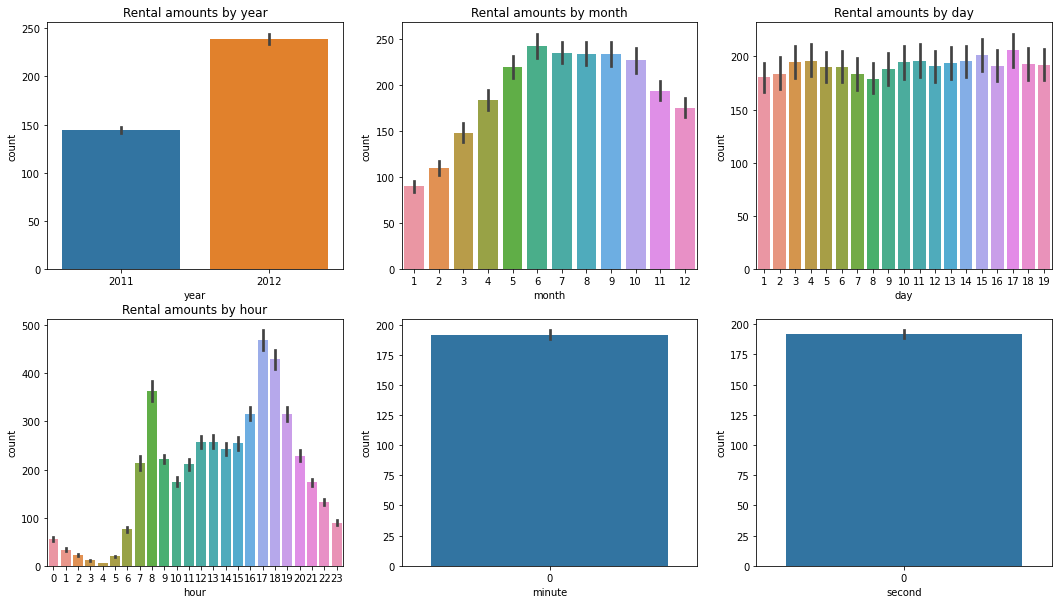

In [11]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 10)

sns.barplot(data=df_train, x="year", y="count", ax=ax1)  #연별: 2011년보다 2012년의 대여량이 많다
sns.barplot(data=df_train, x="month", y="count", ax=ax2)  #월별: 6월 대여량이 가장 많고, 주로 따뜻한 계절(5~10월)에 대여량이 많다
sns.barplot(data=df_train, x="day", y="count", ax=ax3)  #일별: 뚜렷한 차이가 없다. 그러나 train_data에 1~19일만 있고 test_data에 20~월말까지 있으므로 이 feature을 사용할 수 없다
sns.barplot(data=df_train, x="hour", y="count", ax=ax4)  #시간별: 출퇴근 시간(8시, 17~18시)에 대여량이 많다
sns.barplot(data=df_train, x="minute", y="count", ax=ax5)  #분별: 모두 0으로 되어 있어 사용할 수 없다
sns.barplot(data=df_train, x="second", y="count", ax=ax6)  #초별: 모두 0으로 되어 있어 사용할 수 없다

ax1.set(title="Rental amounts by year")
ax2.set(title="Rental amounts by month")
ax3.set(title="Rental amounts by day")
ax4.set(title="Rental amounts by hour");

## 시즌별, 근무일/휴무일에 따른 대여량 평균치

<AxesSubplot:xlabel='workingday', ylabel='count'>

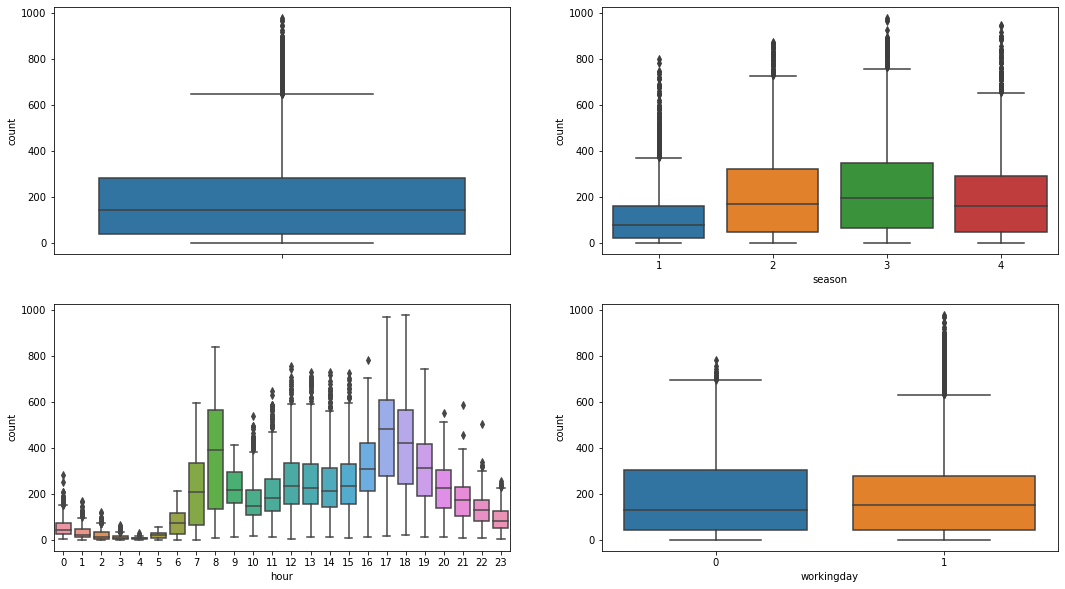

In [12]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 10)

sns.boxplot(data=df_train, y='count', ax=ax1)
sns.boxplot(data=df_train, x='season', y='count', ax=ax2)  #3사분기 대여량이 가장 많다
sns.boxplot(data=df_train, x='hour', y='count', ax=ax3)  #출퇴근 시간(8시, 17~18시)에 대여량이 많다
sns.boxplot(data=df_train, x='workingday', y='count', ax=ax4)

## datatime을 기반으로 요일 추출

In [13]:
#dt.dayofweek는 해당 요일을 만들어준다(Monday=0 ~ Sunday=6)

df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
print(df_train.shape)
df_train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [14]:
df_train['dayofweek'].value_counts().sort_values()  #월,화,수,목,금,토,일이 비슷하게 분포되어 있다

4    1529
1    1539
0    1551
2    1551
3    1553
6    1579
5    1584
Name: dayofweek, dtype: int64

## 시간대별 자전거 대여량(by 근무일 유무, 요일, 시즌, 날씨)

<AxesSubplot:xlabel='hour', ylabel='count'>

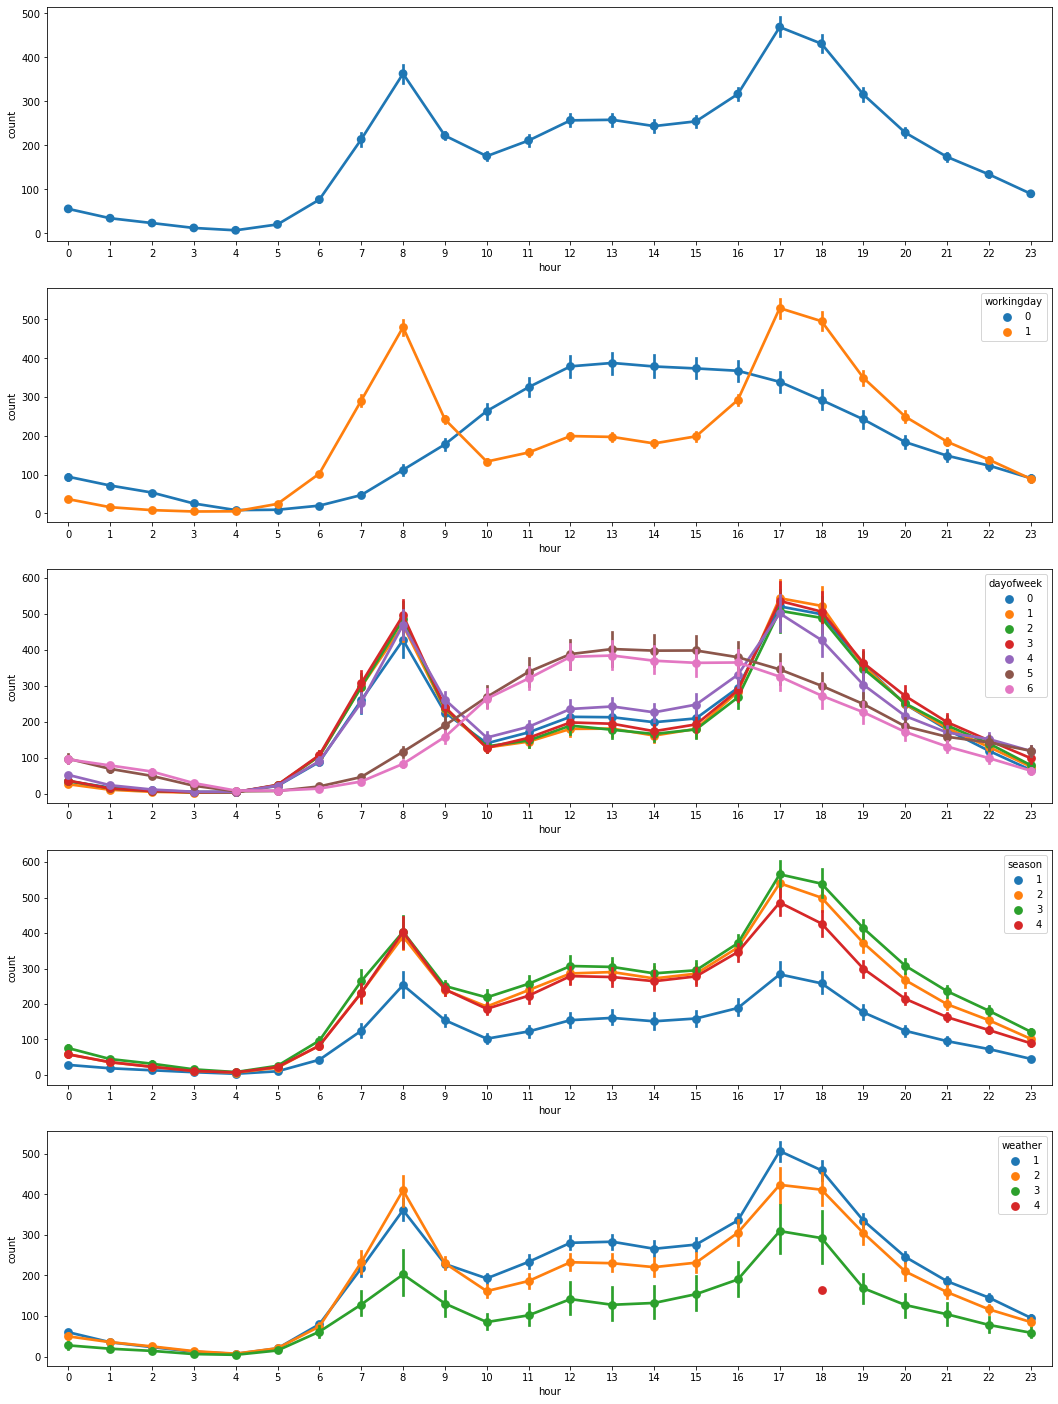

In [15]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=df_train, x='hour', y='count', ax=ax1)  #출퇴근 시간(8시, 17~18시)에 대여량이 많다
sns.pointplot(data=df_train, x='hour', y='count', hue='workingday', ax=ax2)  #근무일에 출퇴근 시간(8시, 17~18시)에 대여량이 많고, 휴무일에는 낮 시간(12~16시)에 대여량이 많다
sns.pointplot(data=df_train, x='hour', y='count', hue='dayofweek', ax=ax3)  #월~금에는 출퇴근 시간(8시, 17~18시)에 대여량이 많고, 토~일에는 낮 시간(12~16시)에 대여량이 많다
sns.pointplot(data=df_train, x='hour', y='count', hue='season', ax=ax4)  #3사분기 대여량이 가장 많고, 1사분기 대여량이 가장 적다
sns.pointplot(data=df_train, x='hour', y='count', hue='weather', ax=ax5)  #날씨가 좋을 때는 대여량이 많고, 날씨가 나쁠 떄는 대여량이 적다

## feature간 상관관계

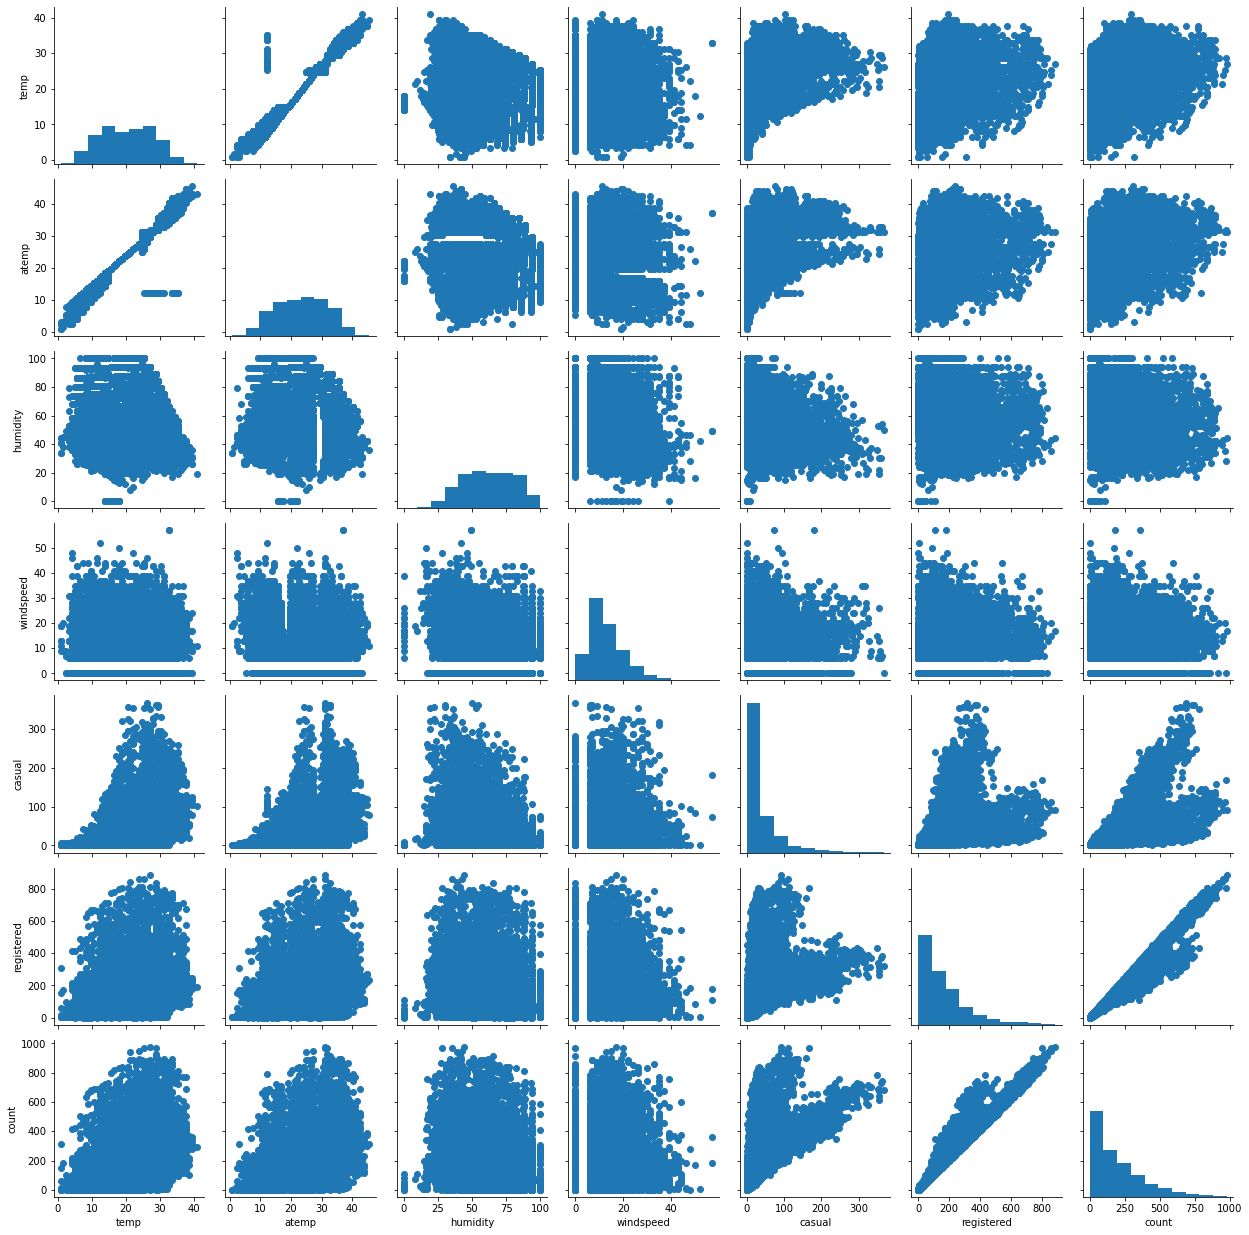

In [16]:
g = sns.PairGrid(data=df_train, vars=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [17]:
corr_matrix = df_train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr_matrix = corr_matrix.corr()
corr_matrix

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [18]:
mask = np.array(corr_matrix)
print(mask)
print(np.tril_indices_from(mask))
mask[np.tril_indices_from(mask)] = False
mask

[[ 1.          0.98494811 -0.06494877 -0.01785201  0.46709706  0.31857128
   0.39445364]
 [ 0.98494811  1.         -0.04353571 -0.057473    0.46206654  0.31463539
   0.38978444]
 [-0.06494877 -0.04353571  1.         -0.31860699 -0.3481869  -0.26545787
  -0.31737148]
 [-0.01785201 -0.057473   -0.31860699  1.          0.09227619  0.09105166
   0.10136947]
 [ 0.46709706  0.46206654 -0.3481869   0.09227619  1.          0.49724969
   0.69041357]
 [ 0.31857128  0.31463539 -0.26545787  0.09105166  0.49724969  1.
   0.97094811]
 [ 0.39445364  0.38978444 -0.31737148  0.10136947  0.69041357  0.97094811
   1.        ]]
(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 5, 6]))


array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.46709706,
         0.31857128,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.46206654,
         0.31463539,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.3481869 ,
        -0.26545787, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09227619,
         0.09105166,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.49724969,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

<AxesSubplot:>

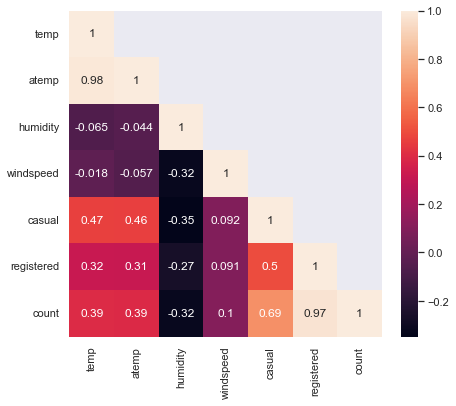

In [19]:
sns.set(rc={'figure.figsize':(7,6)})
sns.heatmap(corr_matrix, mask=mask, annot=True)

#기온, 체감기온, 습도, 풍속은 상관관계가 거의 없다
#registered는 상관관계가 높지만 테스트 데이터에 없으므로 사용할 수 없다

## 기온, 습도, 풍속 시각화

<AxesSubplot:xlabel='windspeed', ylabel='count'>

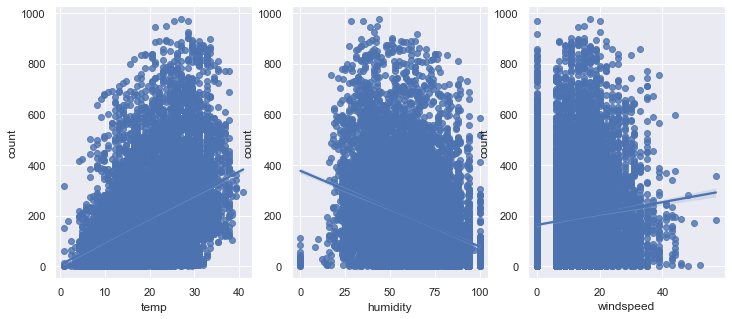

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sns.regplot(x="temp", y="count", data=df_train,ax=ax1)
sns.regplot(x="humidity", y="count", data=df_train,ax=ax2)
sns.regplot(x="windspeed", y="count", data=df_train,ax=ax3)
#풍속이 0인 데이터가 많은 것은 관측치가 없기때문인 것으로 추측된다

## 연도별, 월별 자전거 대여량

In [21]:
def concat_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

df_train['year_month'] = df_train['datetime'].apply(concat_year_month)

df_train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


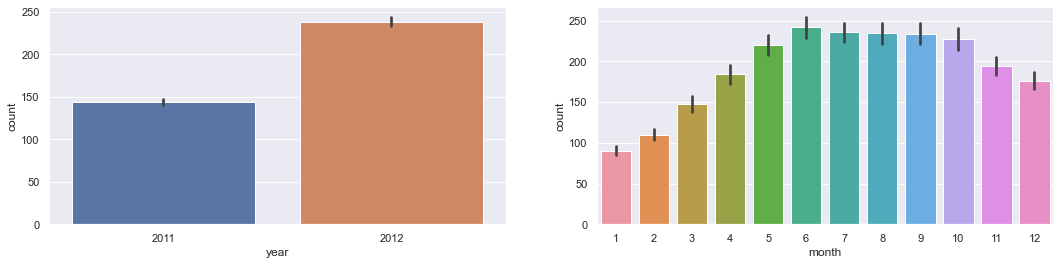

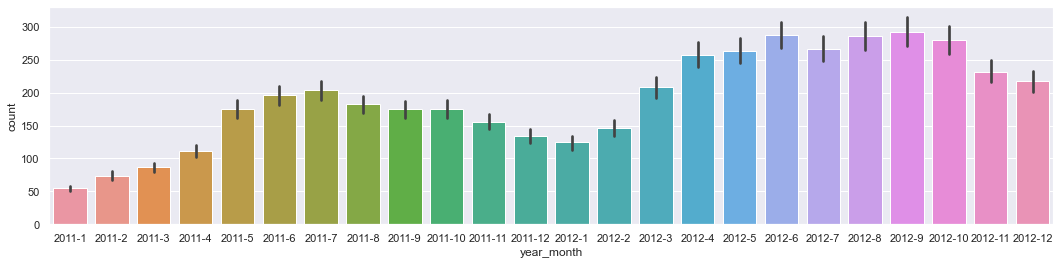

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=df_train, x='year', y='count', ax=ax1)
sns.barplot(data=df_train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=df_train, x='year_month', y='count', ax=ax3);

#2011년과 2012년의 월별 대여량 양상은 비슷하지만 2012년의 대여량이 많다

## 3시그마 초과하는 이상치 제거

In [23]:
df_train_without_outliers = df_train[df_train['count'] - df_train['count'].mean() < 3*df_train['count'].std()]

print(df_train.shape)
print(df_train_without_outliers.shape)

(10886, 20)
(10739, 20)


## 대여량 로그화

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

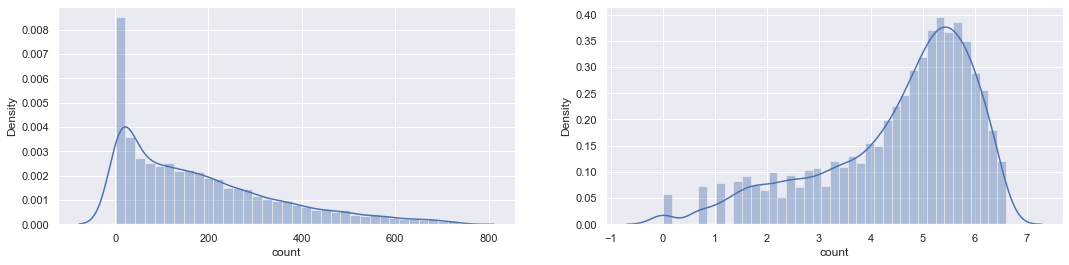

In [24]:
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.distplot(df_train_without_outliers['count'], ax=axes[0]);
sns.distplot(np.log(df_train_without_outliers['count']), ax=axes[1])

#종속 변수가 정규분포를 따르면 분석에 용이하다
#완벽한 정규 분포는 아니지만 정규 분포에 가까워졌다